### Import Iris dataset and libraries


In [1]:
from sklearn.datasets import load_iris
from math import fsum, sqrt
from typing import List
from collections import defaultdict
from random import sample

import matplotlib.pyplot as plt

### Load Iris data


In [2]:
iris = load_iris()
data = iris.data

### Explore data


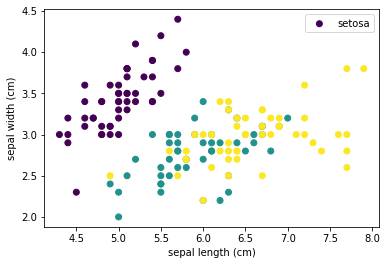

In [3]:
# sns.pairplot(iris_csv, hue='species')
# x contains all the sepal length and y contains the sepal width
x = data[: , 0]
y = data[: , 1]
 
plt.scatter(x, y, c=iris.target)
 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(iris.target_names)
 
plt.show()

### Functions

In [4]:
def random_points(data, k) -> List:
  """Arbitrary points as center for each cluster"""
  return sample(data,k)
  
def mean(data) -> float:
    """Arithmetic mean"""
    return fsum(data) / len(data)


def transpose(data):
    """Swap and group all the Xs Ys Zs and As in a data row"""
    return list(zip(*data))

def distance(p , q , fsum=fsum, sqrt=sqrt, zip=zip):
    """Pythagorean theorem to calculate distance between two data points"""
    return sqrt(fsum([(x - y) ** 2 for x, y in zip(p, q)])) 


def assign_data(centroids, data):
    """Group data points to the closest centroid"""
    
    d = defaultdict(list) #use defaultdict to group points around centroids
    for point in data:
      # finding the point with the shortest distance to a centroid
        closest_centroid = min(centroids, key=lambda centroid: 
                               distance(point, centroid))  
       # assign data point to the closest centroid
        d[closest_centroid].append(point) 
    return dict(d)


def compute_centroids(groups):
    """Compute cluster centers"""
    return [tuple(list(map(mean, transpose(group)))) for group in groups]


def kmeans(data, k: int=3):
    """K-means clustering using an arbitrary or the default k value of 3"""
    data = [tuple(i) for i in data]
    centroids = random_points(data, k)  # generate random centers
    old_centroids = []
    labeled_data = {}

    #loop stops when the centroids don't change anymore
    while old_centroids != centroids:
        old_centroids = centroids    
        labeled_data = assign_data(centroids, data) 

        # compute new centroids
        centroids = compute_centroids(labeled_data.values())
    
    return labeled_data   
    

# **K-MEANS CLUSTERING**


In [5]:
results = kmeans(data)

### Separate Centroids and Values



In [6]:

def extract(clusters):
    """Extract values in the kmeans dictionary"""
    
    #group final centroids keys
    centroid_list = list(clusters.keys())

    #extract values per centroid key
    datapoints = []
    for i in range(len(centroid_list)):
        # go through every key-value pair of the kmeans and
        # make a new array of all values
        batchpoints = list(results.values())[i]

        #converting datapoints from tuples to list
        batchpoints = [list(item) for item in batchpoints]
        
        datapoints.append(batchpoints)
    return datapoints

Data visualization

This section of code is hard-coded and not built to scale. Future updates will cater for that

Text(0, 0.5, 'Sepal Width')

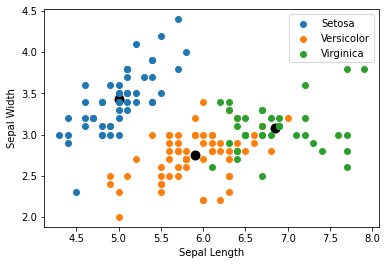

In [7]:

cluster_data = extract(results)
cluster_data[0]
cluster_data[1]
cluster_data[2]


#First Cluster
sepal_x = []
sepal_y = []
for i in range(len(cluster_data[0])):
    sepal_x.append(cluster_data[0][i][0])
    sepal_y.append(cluster_data[0][i][1])

#Second Cluster
second_sepal_x = []
second_sepal_y = []
for i in range(len(cluster_data[1])):
    second_sepal_x.append(cluster_data[1][i][0])
    second_sepal_y.append(cluster_data[1][i][1])

#Third Cluster
third_sepal_x = []
third_sepal_y = []
for i in range(len(cluster_data[2])):
    third_sepal_x.append(cluster_data[2][i][0])
    third_sepal_y.append(cluster_data[2][i][1])


centroid_list = list(results.keys())

#Plot Centroids
plt.scatter(x=centroid_list[0][0], y=centroid_list[0][1], 
            c='black', marker='o', linewidths=4)
plt.scatter(x=centroid_list[1][0], y=centroid_list[1][1], 
            c='black', marker='o', linewidths=4)
plt.scatter(x=centroid_list[2][0], y=centroid_list[2][1], 
            c='black', marker='o', linewidths=4)

plt.scatter(x=sepal_x, y=sepal_y, label='Setosa')
plt.scatter(x=second_sepal_x, y=second_sepal_y, label='Versicolor')
plt.scatter(x=third_sepal_x, y=third_sepal_y, label='Virginica')
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
